In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drinks.csv')

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [4]:
top10_spirit = df.sort_values('spirit_servings', 
                              ascending=False)[:10]\
                 .reset_index(drop=True)\
                 [['country', 'spirit_servings']]

# Pie Chart

Pie charts and donut plots (which are practically pie charts with the central area cut out) represent the most common alternative to bar plots . However, if to choose between them and bar plots, the second seems a safer choice. In fact, pie charts, being based on angles rather than lengths, are usually more difficult to read and extract insights from. If we have a lot of categories in a pie chart and/or the categories with almost equal proportions, it would be quite complicated even to try to find the biggest/smallest category, not to mention ordering them by value:

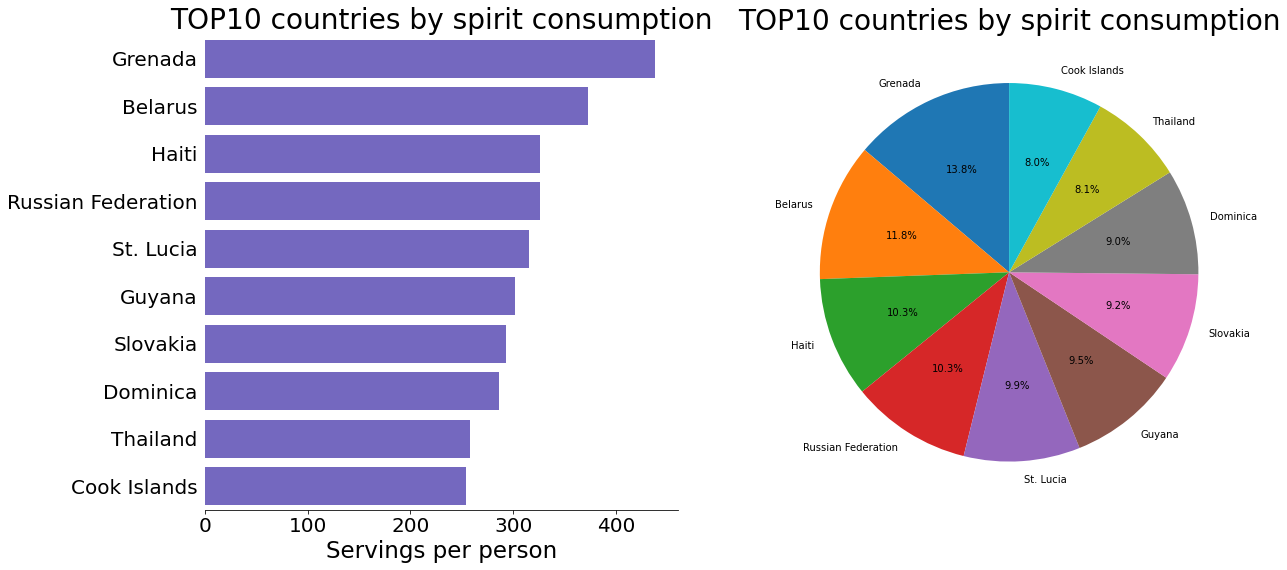

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout(pad=4)

# Creating a case-specific function to avoid code repetition
# (will be used for comparing with 2 more plot types)
def plot_hor_bar_2():
    ax = sns.barplot(x='spirit_servings', y='country',
                     data=top10_spirit, color='slateblue')
    plt.title('TOP10 countries by spirit consumption', fontsize=28)
    plt.xlabel('Servings per person', fontsize=23)
    plt.xticks(fontsize=20)
    plt.ylabel(None)
    plt.yticks(fontsize=20)
    sns.despine(left=True)
    ax.grid(False)
    ax.tick_params(bottom=True, left=False)
    return None

plt.subplot(1,2,1)
plot_hor_bar_2()

plt.subplot(1,2,2)
plt.pie(top10_spirit['spirit_servings'],
        labels=top10_spirit['country'],
        startangle=90, autopct='%1.1f%%')
plt.title('TOP10 countries by spirit consumption', fontsize=28)
plt.rcParams['font.size']=18
plt.show()

# Tree Map

Like bar and pie plots, a treemap shows what the whole data consists of. It displays hierarchical data as a set of nested rectangles, with the area of each rectangle being proportional to the value of the corresponding data. To customize a treemap, we can assign a list of colors for the rectangles, color and font size for the labels, and some other parameters.

In [9]:
!pip install squarify

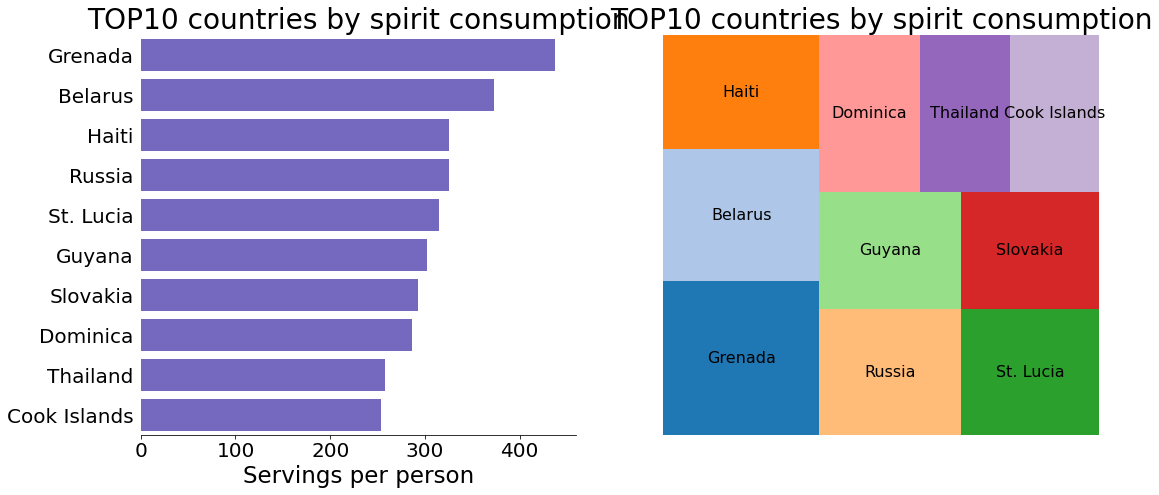

In [11]:
import squarify
import matplotlib.pyplot as plt

# Renaming Russian Federation into Russia to avoid too long lables
top10_spirit.at[3, 'country'] = 'Russia'

fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout(pad=4)

plt.subplot(1,2,1)
plot_hor_bar_2()

plt.subplot(1,2,2)
cmap = plt.cm.tab20

colors = []
for i in range(len(top10_spirit.index)):
    colors.append(cmap(i))    

squarify.plot(sizes=top10_spirit['spirit_servings'],
              label=top10_spirit['country'],
              color=colors,
              text_kwargs={'fontsize': 16})
plt.title('TOP10 countries by spirit consumption', fontsize=28)
plt.axis('off')
plt.show()

# Stem Plot

A stem  plot represents a good alternative to a bar chart with many bars, or with bars of similar lengths. It maximizes the data-ink ratio of a chart and makes it more readable. To create a horizontal stem plot, we can use either stem() or vlines() function, to create a vertical one – only hlines() in combination with plot(). These functions have a lot of parameters to tune for improving the appearance of the resulting plot. In this article, you can find more information on how to customize both stem plots and treemaps.

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout(pad=4)

plt.subplot(1,2,1)
plot_hor_bar_2()
top_sorted = top10_spirit.sort_values('spirit_servings',
                                      ascending=True)\
                         .set_index('country')

plt.subplot(1,2,2)
plt.hlines(y=top_sorted.index, xmin=0, xmax=top_sorted,
           color='slateblue')
plt.plot(top_sorted, top_sorted.index,
         'o', color='slateblue')
plt.title('TOP10 countries by spirit consumption', fontsize=28)
plt.xlabel('Servings per person', fontsize=23)
plt.xticks(fontsize=20)
plt.xlim(0, None)
plt.ylabel(None)
plt.yticks(fontsize=20)
sns.despine(left=True)
ax.grid(False)
ax.tick_params(bottom=True, left=False)
plt.show()

# Specific Types of Bar Plots
There are some particular types of bar charts, which can be of use in certain, rather limited conditions:

Radial bar plots look like involute bar charts, plotted not in Cartesian but polar coordinates. Each bar starts at a different radial point and has a circular shape instead of a line. Even though these visualizations look rather effective, they should be almost always avoided, since they strongly distort the perception of the data behind them and are difficult to analyze: the bars have different perimeters (instead of lengths, as common bar plots), the inner ones, which are supposed to be the smallest, seem even smaller and the outer ones seem larger, even though some of them can be of the same length. The absence of the y-axis on such graphs creates additional confusion. Sometimes radial bar charts are mistakingly called circular, which is actually another type of graphs that we’ll see soon. You can check this StackOverflow 3 post on how to create radial bar plots in Python.

Circular and polar bar charts have the bars in a form of segments of different lengths, starting from a circle (circular version) or a point (polar version) instead of a line as in conventional bar plots. These kinds of graphs work best for a large number of categories (bars) with an evident pattern of cyclicity in them. In all the other cases, though, circular and polar bar plots are not a good choice because of some issues: the absence of y-axis, difficulty to visually interpret the length differences between segments, an optical illusion of the smaller bars (those close to the base circle or point) being even smaller. Here 1 is a demo of how to create a polar bar chart in matplotlib.

Gantt chart 3. Illustrates a project schedule, the relationships between different activities, and the current schedule status.

Waterfall chart 4. Shows how a starting value has been modified (increased or decreased) up to a final value after sequentially applied positive or negative changes in a data series.